___

![title](Title.png)
___

## Abstract
This project focuses on the fluid dynamics problem of flow between two plates with a given
top plate velocity and pressure. In this particular case we assume a no-slip condition, which means
that the top plate is fixed. We assume that the pressure gradient is constant, and obtain
both analytic and numerical solutions for the velocity profile, mass flow rate, and wall shear stress.
Numerical results are compared with the analytical results to determine the error magnitude in
the numerical results. By varying the step size, the numerical approximations are shown to be
very accurate when compared to the analytical results.

## Numerical Solution
The governing Navier-Stokes equation for fluid flow between two plates can be shown to have the form:

$0 = -\frac{dp}{dx} + \mu\frac{\partial ^2 u}{\partial y^2}$

With boundary conditions

$u(0) = 0$,

$u(h) = U$

where $u$ is the velocity of the fluid, $µ$ is the viscosity, and $p$ is the pressure. This project will
examine the specific case where U = 0 and P = 1. In other words, the top plate remains stationary
and the pressure is constant and not a function of $x$. 

In order to solve this equation numerically, it must be non-dimensionalized and discretized into _n_ distinct solution points. Later, I will show how we can influence the accuracy of our numerical approximation by adjusting _n_. The non-dimensionalized Navier-Stokes equation has the form:

$\frac{\partial ^2 u^*}{\partial y^{*2}} + 2P^*$

We discretize this equation using a second order forward difference approximation to create a system of $n$ equations, which are placed in matrix form and solved using the Thomas Algorithm.

For a full breakdown of how this equation is derived, see the PDF technical report.




## Code

In [1]:
import numpy as np

# Set up problem constants

U = 0  # Top plate velocity
P = 1  # Pressure
h = 1  # Distance between top and bottom plate
n = 300  # Step size
dy = 1 / n  # dy or Delta y, the distance traveled with each step. Note that dy = (b - a)/n and (b - a) = (h - 0), or (b - a) = 1

# Compute the analytical solution for comparison

points  = np.linspace(0,1,n)
exact_solution = -1 * points**2 + points

# Prepare the solution matrix

solution_matrix = np.zeros((n, n+1))

solution_matrix[0,0] = 1 # First row boundary condition
solution_matrix[n-1,n-1] = 1 # Last row boundary condition

# Loop to fill rest of solution matrix with central difference coefficients

for x in range(1, n-1):
    solution_matrix[x, (x-1)] = 1
    solution_matrix[x, x] = -2
    solution_matrix[x, (x+1)] = 1
    solution_matrix[x, n] = -2 * dy**2
    
# Using Thomas Algorithm to solve solution matrix
# a, b, c are column vectors from the tridiagonal system in the solution matrix. d is the solution vector


a, b, c, d = np.zeros(n),np.zeros(n),np.zeros(n),np.zeros(n) # initializing all 4 vectors

# Assigning coefficient values

a[0], a[n-1], a[1:n-1] = 0, 0, 1
b[0], b[n-1], b[1:n-1] = 1, 1, -2
c[0], c[n-1], c[1:n-1] = 0, 0, 1
d[0], d[n-1], d[1:n-1] = 0, U, -2 * P * dy**2

# Loop to create upper trangular with main diagonal = 1

for x in range(0, n-1):
    c[x] = c[x] / b[x]
    d[x] = d[x] / b[x]
    b[x] = 1

    temp = a[x+1]
    a[x+1] = 0
    b[x+1] = b[x+1] - temp * c[x]
    d[x+1] = d[x+1] - temp * d[x]

# Back substitution

solution_vector = np.zeros(n)
solution_vector[n-1] = d[n-1]/b[n-1]

for x in range(n-2, -1, -1):
    solution_vector[x] = d[x] - c[x] * solution_vector[x+1]
    

# While we're at it, let's solve for flow rate and wall shear stress

# Flow rate - using trapezoidal rule

V = 0

for x in range(0, n-2):
    V = V + ((solution_vector[x])+(solution_vector[x+1])) / 2  * dy

# Wall shear stress - using 2nd order forward difference approximation

t_wall = ((-3/2)*solution_vector[0] + 2*solution_vector[1] - (1/2)*solution_vector[2]) / dy

## Plots

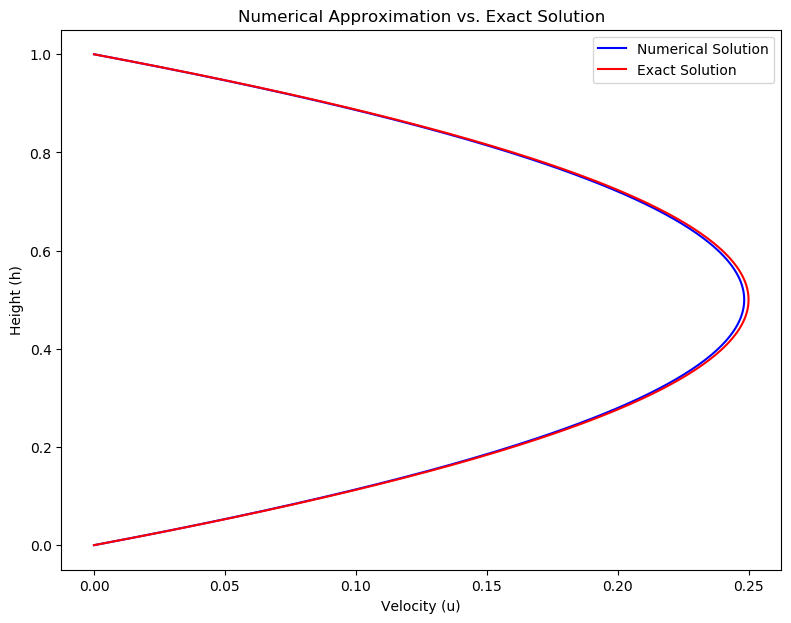

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create Figure (empty canvas)
fig = plt.figure(figsize=(8,6), dpi=100)

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(solution_vector, points, 'b', label='Numerical Solution')
axes.plot(exact_solution, points, 'r', label='Exact Solution')
axes.set_xlabel('Velocity (u)') # Notice the use of set_ to begin methods
axes.set_ylabel('Height (h)')
axes.set_title('Numerical Approximation vs. Exact Solution')
axes.legend()

The above figure demonstrates that when we make $n$ sufficiently large (300 distinct solution points in this case), our numerical approximation becomes a very accurate approximation for the solution of our differential equation. For a more complete analysis of this project, please refer to the technical report PDF.